# Section 1. Intro to Pandas

We have used Python lists and Numpy arrays to store and manipulate data.
Each method has its place in a Python program.
But there's an excellent Python package called Pandas that greatly facilitates handling data and more importantly, managing data from files.
Pandas uses the DataFrame, which can be thought of as a large table with built-in functions to:
- process rows and columns
- read and write to many different formats on disk
- interact with other DataFrames.

One key advantage of pandas over other types of data storage is that it can easily handle manage many different data types.

## 1.1 Getting Started

First, we need to import the package. We should also import NumPy for other useful functions and matplotlib for when we plot
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 The DataFrame

Here, we will demonstrate how to create a DataFrame using lists.
First, let's define some familiar looking Solar System data.

```
planets = [['Mercury', 0.0553, 0.4, 0],
           ['Venus', 0.815, 0.7, 0],
           ['Earth', 1.0, 1.0, 1],
           ['Mars', 0.107, 1.5, 2],
           ['Jupiter', 317.8, 5.2, 80],
           ['Saturn', 95.2, 9.5, 83],
           ['Uranus', 14.5, 19.2, 27],
           ['Neptune', 17.1, 30.1, 14]]

colnames = ['Name','Mass','Distance','N_moons']
# Units: None, Earth Masses, AU, None
```

Take note of a few things here.

First, unlike in NumPy arrays, where you can only have one data type (usually int or float), each row in the above table mixes three different types of data: string, float, and int. This is one of the advantages of Pandas: different columns are allowed to have different data types.

Second, notice that the code above uses a second list to create names for the columns. This is a huge feature of the design philosophy of the DataFrame. While a NumPy 2D array can be thought of as a huge matrix of numbers, a DataFrame really is a table.

Finally, the code included a comment with the units associated with this data. Units were not included in the column names to keep the column names short, which helps writing the code later on be much easier. As a reminder, it is good practice to label units in your code with comments to stay organized and to be able to share your code with others so they can easily understand it.

Now, let's make a dataframe named `df` from the lists named `planets` and show it.
```
df = pd.DataFrame(planets, columns=colnames)
print(df)

```
In the second cell, try running just `df` to see how the output may look different. This distinction is only relevant when working in a Jupyter notebook and when datasets are small enough to read and look over in Python.
```
df
```

In [ ]:
planets = [['Mercury', 0.0553, 0.4, 0],
           ['Venus', 0.815, 0.7, 0],
           ['Earth', 1.0, 1.0, 1],
           ['Mars', 0.107, 1.5, 2],
           ['Jupiter', 317.8, 5.2, 80],
           ['Saturn', 95.2, 9.5, 83],
           ['Uranus', 14.5, 19.2, 27],
           ['Neptune', 17.1, 30.1, 14]]

colnames = ['Name','Mass','Distance','N_moons']
# Units: None, Earth Masses, AU, None

#Alternatively can name columns with their units
#colnames = ['Name','m_mEarth','a_AU','N_moons']

In [ ]:
df = pd.DataFrame(planets, columns=colnames)
print(df)

      Name      Mass  Distance  N_moons
0  Mercury    0.0553       0.4        0
1    Venus    0.8150       0.7        0
2    Earth    1.0000       1.0        1
3     Mars    0.1070       1.5        2
4  Jupiter  317.8000       5.2       80
5   Saturn   95.2000       9.5       83
6   Uranus   14.5000      19.2       27
7  Neptune   17.1000      30.1       14


In [ ]:
df

,Name,Mass,Distance,N_moons
0,Mercury,0.0553,0.4,0
1,Venus,0.8150,0.7,0
2,Earth,1.0000,1.0,1
3,Mars,0.1070,1.5,2
4,Jupiter,317.8000,5.2,80
5,Saturn,95.2000,9.5,83
6,Uranus,14.5000,19.2,27
7,Neptune,17.1000,30.1,14


### 1.1.2 Accessing Rows and Cells

To access individual rows, we use the method `df.loc`, where you can replace df with the name of your DataFrame.

In the previous example above, the indices ranged from 0 to 7. So, if we want to access the row for Earth, we can execute
```
df.loc[2]
```
Note that DataFrames can use different indexes. For instance, the indices may not correspond to their row number at all. In fact, you can even find tables where the indices are strings. When using `df.loc` you must remember to use the label given.

To access a specific cell, we specify both the index (as above) and the column name. For example, if we want to get the mass of Venus, we can execute
```
df.loc[2,'Mass']
```
Try this in the cell below.

In [ ]:
df.loc[2]

Name        Earth
Mass          1.0
Distance      1.0
N_moons         1
Name: 2, dtype: object

In [ ]:
df.loc[2,'Mass']

1.0

Note that we can also use this functionality with `.loc` to
change the values of individual cells.

### 1.1.3 Accessing Columns

Accessing individual rows and cells is less useful than you may think since each row only represents one data point. When we're using tables, we're often more interested in the statistics of many data points. The DataFrame structure represents this, because it's very easy to obtain different columns. For example, if we want masses, we could use
```
df['Mass']
```
If we want multiple columns, we enter a list of column names, e.g.,
```
df[['Mass','Distance']]
```

Note that this is why it is best to keep column names short by including units in a comment rather than in the column name as mentioned above. Since we need to write out the column names, adding the units can make the code unnecessarily long.

In [ ]:
df['Mass']

0      0.0553
1      0.8150
2      1.0000
3      0.1070
4    317.8000
5     95.2000
6     14.5000
7     17.1000
Name: Mass, dtype: float64

In [ ]:
df[['Mass','Distance']]

,Mass,Distance
0,0.0553,0.4
1,0.8150,0.7
2,1.0000,1.0
3,0.1070,1.5
4,317.8000,5.2
5,95.2000,9.5
6,14.5000,19.2
7,17.1000,30.1


### 1.1.4 df.values
When using some functions, such `plt.plot()`, we don't need a full Pandas DataFrame. Using `df.values` will extract the values and return a NumPy array.
```
df.values # returns a 2D array
df.loc[2].values # returns a 1D array of the third row
df['Mass'].values # returns a 1D array of the Mass column
```

In [ ]:
df.values

array([['Mercury', 0.0553, 0.4, 0],
       ['Venus', 0.815, 0.7, 0],
       ['Earth', 1.0, 1.0, 1],
       ['Mars', 0.107, 1.5, 2],
       ['Jupiter', 317.8, 5.2, 80],
       ['Saturn', 95.2, 9.5, 83],
       ['Uranus', 14.5, 19.2, 27],
       ['Neptune', 17.1, 30.1, 14]], dtype=object)

In [ ]:
df.loc[2].values

array(['Earth', 1.0, 1.0, 1], dtype=object)

In [ ]:
df['Mass'].values

array([5.530e-02, 8.150e-01, 1.000e+00, 1.070e-01, 3.178e+02, 9.520e+01,
       1.450e+01, 1.710e+01])

## 1.2 Making Changes to a DataFrame
### 1.2.1 Adding New Columns from Data

Suppose we obtain additional data, and we want to add it to our DataFrame. We can do so like this.
```
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88] # in Earth radii

df['Radius'] = radii
```

One big caveat: **your list must be ordered in the same way as your DataFrame.**

Add this new column in the next code cell.

In [ ]:
df

,Name,Mass,Distance,N_moons
0,Mercury,0.0553,0.4,0
1,Venus,0.8150,0.7,0
2,Earth,1.0000,1.0,1
3,Mars,0.1070,1.5,2
4,Jupiter,317.8000,5.2,80
5,Saturn,95.2000,9.5,83
6,Uranus,14.5000,19.2,27
7,Neptune,17.1000,30.1,14


In [ ]:
df['N_moons']=[0,0,1,2,95,146,28,16]
df

,Name,Mass,Distance,N_moons
0,Mercury,0.0553,0.4,0
1,Venus,0.8150,0.7,0
2,Earth,1.0000,1.0,1
3,Mars,0.1070,1.5,2
4,Jupiter,317.8000,5.2,95
5,Saturn,95.2000,9.5,146
6,Uranus,14.5000,19.2,28
7,Neptune,17.1000,30.1,16


In [ ]:
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88] # in Earth radii

df['Radius'] = radii

In [ ]:
df

,Name,Mass,Distance,N_moons,Radius
0,Mercury,0.0553,0.4,0,0.383
1,Venus,0.8150,0.7,0,0.949
2,Earth,1.0000,1.0,1,1.000
3,Mars,0.1070,1.5,2,0.532
4,Jupiter,317.8000,5.2,95,11.210
5,Saturn,95.2000,9.5,146,9.450
6,Uranus,14.5000,19.2,28,4.010
7,Neptune,17.1000,30.1,16,3.880


### 1.2.2 Adding New Columns based on Existing Columns

Columns are essentially NumPy arrays with extra information.
As a result, we can do mathematical operations on columns just like we do with arrays.
We can leverage this to create new columns.
For example, we want to create a new column with the density of each planet. Density is the ratio of the mass of an object over its volume, and we can calculate the densities by using the formula $d = m / v$.  Our DataFrame contains planetary mass in Earth masses and radius data in Earth radius. As a result, we'll convert the masses and radii to SI units, calculate the densities using those values, and add a column named Density to the DataFrame `df`.
```
m_e = 5.9722e24 # kg
r_e = 6.371e6 # m, using the average radius
df['Density'] = m_e*df['Mass']/((4/3)*np.pi*(r_e*df['Radius'])**3)
```

What do you notice about the densities of the outer planets versus the inner planets? Compare these densities to the densities of various materials in this [wikipedia page](https://en.wikipedia.org/wiki/Density#Densities). Which materials are these densities most similar to?

What you should find is that the inner planets are rocky, so their densities are more comparable to metals, while the gas giants have densities that are closer to that of water.

In [ ]:
m_e = 5.9722e24 # kg
r_e = 6.371e6 # m, using the average radius
df['Density'] = m_e*df['Mass']/((4/3)*np.pi*(r_e*df['Radius'])**3)

In [ ]:
df

,Name,Mass,Distance,N_moons,Radius,Density
0,Mercury,0.0553,0.4,0,0.383,5426.898863
1,Venus,0.8150,0.7,0,0.949,5257.531581
2,Earth,1.0000,1.0,1,1.000,5513.443376
3,Mars,0.1070,1.5,2,0.532,3918.066469
4,Jupiter,317.8000,5.2,95,11.210,1243.826982
5,Saturn,95.2000,9.5,146,9.450,621.962845
6,Uranus,14.5000,19.2,28,4.010,1239.817617
7,Neptune,17.1000,30.1,16,3.880,1614.075525


### 1.2.3 Practice Problem 1: Kepler's Law

Using Kepler's Third Law, make another column that corresponds to the orbital period for each planet **in years.** Once again, Keplers Third Law is

$$T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$$

For the case of solar system planets, you may make the approximation that $M_1 + M_2 \approx M_\odot$.

You can calculate by hand how many seconds are in a year, but note a year technically has 365.25 days.

Use the Astronomical Quantities notebook for the other quantities you need.

In [ ]:
AU_to_m = 1.496e11
G = 6.6743e-11
mEarth_to_kg = 5.9722e24
mSun_to_kg = 1.989e30
sYR = 31558149.9

porb_s = 2 * np.pi * np.sqrt((df['Distance']*AU_to_m)**3/(G*((df['Mass']*m_e)+mSun_to_kg)))
porb_yr = porb_s / porb_s[2]

df['Orbital_Period'] = porb_yr
print(porb_s[2])

31554140.375192862


In [ ]:
df

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period
0,Mercury,0.0553,0.4,0,0.383,5426.898863,0.252983
1,Venus,0.8150,0.7,0,0.949,5257.531581,0.585662
2,Earth,1.0000,1.0,1,1.000,5513.443376,1.000000
3,Mars,0.1070,1.5,2,0.532,3918.066469,1.837120
4,Jupiter,317.8000,5.2,95,11.210,1243.826982,11.852189
5,Saturn,95.2000,9.5,146,9.450,621.962845,29.276826
6,Uranus,14.5000,19.2,28,4.010,1239.817617,84.128480
7,Neptune,17.1000,30.1,16,3.880,1614.075525,165.135044


### 1.2.4 Practice Problem 2: Equilibrium Temperature

The [equilibrium temperature](https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature) of a planet is defined as the temperature at which the power supplied by its star (due to solar radiation) is equal to the power emitted by the planet (due to blackbody radiation). The formula (in units of Kelvin) is as follows:

$$ T_{\rm eq} =  \left( \frac{L (1 - A_B)}{16\sigma\pi a^2} \right)^{1/4}$$

For the solar system, we would use $L_\odot$, a is the distance between the planet and the Sun, $\sigma$ is the Stefan-Boltzmann constant, and $A_B$ is the [Bond Albedo](https://en.wikipedia.org/wiki/Bond_albedo).

Your task:
1. Create a new column for the Bond albedo of each planet, taking the data from the linked wikipedia article
2. Create a new column for the equilibrium temperature using the formula above.
3. Create a new column for the effective/surface temperature of each planet using the values listed below.
4. Create a scatter plot of the predicted equilibrium temperature versus the actual surface temperature. Show the 1-to-1 line using a dotted line for comparison. After reading the first linked wikipedia article, can you think of at least one reason why they may be different? (Hint: you've definitely learned about one of them in other science classes or the news)

```
Teff = [412.5, 737, 288, 215, 124.4, 95, 59.1, 59.3]
```
These values were taken from de Pater and Lissauer (2010).



In [ ]:
df['A_Bond'] = [0.088, 0.76, 0.306, 0.25, 0.503, 0.342, 0.300, 0.290]

Lsun = 3.839e26
sigma = 5.67e-8

df['T_eq'] = ((Lsun*(1-df['A_Bond']))/(16*sigma*np.pi*(df['Distance']*AU_to_m)**2))**(0.25)

df['T_eff'] =  [412.5, 737, 288, 215, 124.4, 95, 59.1, 59.3]

df

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
0,Mercury,0.0553,0.4,0,0.383,5426.898863,0.252983,0.088,430.372206,412.5
1,Venus,0.8150,0.7,0,0.949,5257.531581,0.585662,0.760,233.012540,737.0
2,Earth,1.0000,1.0,1,1.000,5513.443376,1.000000,0.306,254.223311,288.0
3,Mars,0.1070,1.5,2,0.532,3918.066469,1.837120,0.250,211.638751,215.0
4,Jupiter,317.8000,5.2,95,11.210,1243.826982,11.852189,0.503,102.556438,124.4
5,Saturn,95.2000,9.5,146,9.450,621.962845,29.276826,0.342,81.389836,95.0
6,Uranus,14.5000,19.2,28,4.010,1239.817617,84.128480,0.300,58.143263,59.1
7,Neptune,17.1000,30.1,16,3.880,1614.075525,165.135044,0.290,46.602245,59.3


(750.0, 0.0)

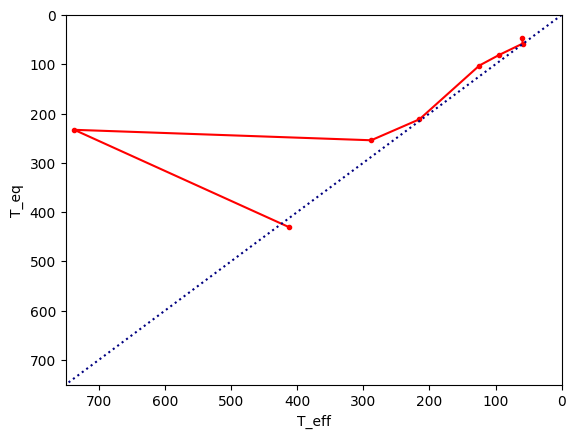

In [ ]:
x = np.linspace(0,750,100)

plt.plot(df['T_eff'], df['T_eq'], marker='.', color = 'red')
plt.plot(x,x, color='navy', linestyle=':')
plt.xlabel('T_eff')
plt.ylabel('T_eq')
plt.xlim([750,0])
plt.ylim([750,0])

They don't match for Venus at all because of Venus's runaway greenhouse gas issue. Earth also has a higher temperature than predicted because of that. However, it is not to the extreme of Venus.

## 1.3 Intermediate Pandas

### 1.3.1 Boolean Indexing with DataFrames

When using data, we are often only interested in a subset based on certain conditions. In pandas, we can filter DataFrames using a similar method that we used for NumPy. The key difference is that we will use the column names instead of their indices. For example, suppose we are only interested in planets that have moons.

```
df[df['N_moons'] > 0]
```

As before, we can chain multiple conditionals together. For example, let's get  the planets that have moons **and** that are further than 5 au from the Sun.

```
df[(df['N_moons'] > 0) & (df['Distance'] > 5)]
```

As a reminder, here is a list of the logical operators you can use:

```
== # equal to
!= # not equal to
<= # less than or equal to
<  # less than
>= # greater than or equal to
>  # greater than

& # logical and
| # logical or
~ # logical not
```


In [ ]:
df[df['N_moons'] > 0]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
2,Earth,1.000,1.0,1,1.000,5513.443376,1.000000,0.306,254.223311,288.0
3,Mars,0.107,1.5,2,0.532,3918.066469,1.837120,0.250,211.638751,215.0
4,Jupiter,317.800,5.2,95,11.210,1243.826982,11.852189,0.503,102.556438,124.4
5,Saturn,95.200,9.5,146,9.450,621.962845,29.276826,0.342,81.389836,95.0
6,Uranus,14.500,19.2,28,4.010,1239.817617,84.128480,0.300,58.143263,59.1
7,Neptune,17.100,30.1,16,3.880,1614.075525,165.135044,0.290,46.602245,59.3


In [ ]:
df[(df['N_moons'] > 0) & (df['Distance'] > 5)]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
4,Jupiter,317.8,5.2,95,11.21,1243.826982,11.852189,0.503,102.556438,124.4
5,Saturn,95.2,9.5,146,9.45,621.962845,29.276826,0.342,81.389836,95.0
6,Uranus,14.5,19.2,28,4.01,1239.817617,84.128480,0.300,58.143263,59.1
7,Neptune,17.1,30.1,16,3.88,1614.075525,165.135044,0.290,46.602245,59.3


In [ ]:
df[df['Mass']<= 1]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
0,Mercury,0.0553,0.4,0,0.383,5426.898863,0.252983,0.088,430.372206,412.5
1,Venus,0.8150,0.7,0,0.949,5257.531581,0.585662,0.760,233.012540,737.0
2,Earth,1.0000,1.0,1,1.000,5513.443376,1.000000,0.306,254.223311,288.0
3,Mars,0.1070,1.5,2,0.532,3918.066469,1.837120,0.250,211.638751,215.0


In [ ]:
df[df['T_eff']>df['T_eq']]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
1,Venus,0.815,0.7,0,0.949,5257.531581,0.585662,0.760,233.012540,737.0
2,Earth,1.000,1.0,1,1.000,5513.443376,1.000000,0.306,254.223311,288.0
3,Mars,0.107,1.5,2,0.532,3918.066469,1.837120,0.250,211.638751,215.0
4,Jupiter,317.800,5.2,95,11.210,1243.826982,11.852189,0.503,102.556438,124.4
5,Saturn,95.200,9.5,146,9.450,621.962845,29.276826,0.342,81.389836,95.0
6,Uranus,14.500,19.2,28,4.010,1239.817617,84.128480,0.300,58.143263,59.1
7,Neptune,17.100,30.1,16,3.880,1614.075525,165.135044,0.290,46.602245,59.3


In [ ]:
df[df['T_eff']<df['T_eq']]

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
0,Mercury,0.0553,0.4,0,0.383,5426.898863,0.252983,0.088,430.372206,412.5


### 1.3.2 df.iterrows()

Most times, iterating through the rows of a pandas DataFrame is not the best way to approach your problems. Most problems are best accomplished by using the columns of a DataFrame in your calculation similar to how we previously used NumPy.

If you find it necessary to iterate over the rows of a DataFrame, we can use the function `df.iterrows()` which will iterate over all the rows in the DataFrame. In the following example
```
for i, row in df.iterrows():
    print(row['Name'],'has',row['N_moons'],'moons.')
```
In this example, `df.iterrows()` returns an index, series pair for each row in the dataframe. Since each row is returned as a Pandas Series, we can use the original column names to access the columns.

Note for reference we could have performed this example in a completely vectorized way:
```
str_ser = df['Name']+' has '+ df['N_moons'].astype(str) + ' moons.'
print('\n'.join(str_ser))
```
In the above example, I make a new Series by adding the different strings together. Notice the use of the `Series.astype(str)` function to turn the integers into strings. Then, I use the join function to turn the Series of strings into one long string, where the original strings are separated by a return character. Thus, we have reproduced the output of the previous for loop.

In [ ]:
for i, row in df.iterrows():
    print(row['Name'],'has',row['N_moons'],'moons.')

Mercury has 0 moons.
Venus has 0 moons.
Earth has 1 moons.
Mars has 2 moons.
Jupiter has 95 moons.
Saturn has 146 moons.
Uranus has 28 moons.
Neptune has 16 moons.


In [ ]:
str_ser = df['Name']+' has '+ df['N_moons'].astype(str) + ' moons.'
print('\n'.join(str_ser))

Mercury has 0 moons.
Venus has 0 moons.
Earth has 1 moons.
Mars has 2 moons.
Jupiter has 95 moons.
Saturn has 146 moons.
Uranus has 28 moons.
Neptune has 16 moons.


In [ ]:
for i, row in df.iterrows():
    print(f"{row['Name']:7s} has an equilibrium temperature of {row['T_eq']:.1f} K.")

Mercury has an equilibrium temperature of 430.4 K.
Venus   has an equilibrium temperature of 233.0 K.
Earth   has an equilibrium temperature of 254.2 K.
Mars    has an equilibrium temperature of 211.6 K.
Jupiter has an equilibrium temperature of 102.6 K.
Saturn  has an equilibrium temperature of 81.4 K.
Uranus  has an equilibrium temperature of 58.1 K.
Neptune has an equilibrium temperature of 46.6 K.


In [ ]:
for i, row in df.iterrows():
    print(f"The distance to {row['Name']:7s} is {row['Distance']:4.1f} AU.")

The distance to Mercury is  0.4 AU.
The distance to Venus   is  0.7 AU.
The distance to Earth   is  1.0 AU.
The distance to Mars    is  1.5 AU.
The distance to Jupiter is  5.2 AU.
The distance to Saturn  is  9.5 AU.
The distance to Uranus  is 19.2 AU.
The distance to Neptune is 30.1 AU.


### 1.3.3 Using Other People's Data

You will likely never create your own DataFrame from scratch, instead almost all data you analyze will either be data you get from somewhere else.

A common format for data is called a CSV file for comma separated values. In a CSV file, each row contains the same amount of numbers, each separated by a comma. It's possible to use other "separators" as well. A commonly used one is whitespace, where some number of whitespaces (whether tabs or spaces) are used to separate different values in a row.

One of the main ways to read such files in Pandas is to use `pd.read_csv()`.

```
filename = 'path/to/file'
df = pd.read_csv(filename,...)
```
There are multiple optional parameters worth mentioning.

*   `sep`/`delimiter`: The separator to use. Defaults to `sep=','`. Another useful one is whitespace, which would be `sep='\s+'`.
*   `header`: Often, files will include a first row with a list of names. In this is the case, `header=0` will adopt those column names.
*   `names`: If your file doesn't contain a header (or you don't like the names provided), you can supply your own list of names. If you pass a header in the option above, this parameter will be overwritten, so remember to use either `header` or `names`.
*   `usecols`: If you don't want to read all the columns of a file (e.g. because of memory constraints) then you can pass a subset of columns to use. For example, if you wanted the first two and the fifth column only, then you'd use `usecols=[0,1,4]`.
*   `comment`: It's common for files to be prepended with some number of lines telling you what the file contains and additional details. These lines will begin with some character or combination of characters so that when the computer reads them it's easy to tell which lines to ignore. One common choice is `comment='#'`.

Another important thing to keep in mind: the real world is typically much messier than we would prefer. As a result, we don't always have all the information we want. So, it's common for real data to have a lot of missing values. `read_csv()` will take care of this by filling in the missing values with `np.nan`. Consider these two rows from the data you'll use in the practice problem:
```
324,EPIC 201427007 b,EPIC 201427007,1,1,1,Transit,2021,0.72091000,,1.500,0.134,,,,,,0,5633.00,0.94,,706.3910000
325,EPIC 201497682 b,EPIC 201497682,1,1,1,Transit,2019,2.13174000,,0.692,0.062,,,,,,0,,,0.78,253.0260000
```
Ignoring what these mean for now, notice that in the middle of both rows, there are a lot of commas in a row. These correspond to five columns where either the data doesn't exist. Also, the second row is shorter because it's missing two more values than the first row. When values are missing, they will be filled in with `np.nan`.

### 1.3.4 Practice Problem 3: Binaries

Redo the problem from the NumPy section, but this time using Pandas. This time, the file will be a csv.

Also, additional tasks:
1. Make a scatter plot of mass vs k-type
2. Histograms of binary total mass, mass ratio (smaller mass over larger mass), and the masses of all the individual stars.
3. Histogram of eccentricities.
4. Scatter plot of the total mass vs the mass ratio.
5. Anything else you may think of.

In [ ]:
# Running in Google Colab? Run this cell to download the file for this problem
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/binaries.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-07-19 23:10:20--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/binaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17333 (17K) [text/plain]
Saving to: ‘binaries.csv.2’

binaries.csv.2      100%[===================>]  16.93K  --.-KB/s    in 0.001s  

2024-07-19 23:10:20 (23.0 MB/s) - ‘binaries.csv.2’ saved [17333/17333]



In [ ]:
binaries = pd.read_csv('binaries.csv', index_col=0)
binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc
0,1.0,1.0,0.881213,0.776805,6.286160e+04,0.020687
1,1.0,1.0,1.770394,1.343424,1.471452e+04,0.470695
2,1.0,0.0,0.992801,0.566902,2.505244e+04,0.824416
3,1.0,1.0,2.561173,1.564923,1.522502e+04,0.557290
4,1.0,1.0,3.527993,1.024889,8.829078e+02,0.532985
...,...,...,...,...,...,...
195,1.0,0.0,2.100893,0.547297,6.208494e+02,0.876613
196,1.0,0.0,0.842545,0.540887,4.522517e+06,0.884062
197,1.0,1.0,3.465005,0.850592,7.040274e+04,0.551254
198,1.0,1.0,1.211416,1.100369,4.168088e+06,0.762588


#### Problem 1
How many binaries have stars where at least one is above 1 solar mass? 5 solar masses? 10?

In [ ]:
mSun1 = binaries[(binaries['mass_1'] > 1) | (binaries['mass_2'] > 1)]
print(len(mSun1))

148


In [ ]:
def mass_count(sol_mass):
    m1 = binaries['mass_1']
    m2 = binaries['mass_2']
    mSun = binaries[(m1 > sol_mass)| (m2 > sol_mass)]
    count_mSun = len(mSun)
    print(f'There are {count_mSun} binaries where at least one star has a mass greater than {sol_mass} solar mass(es).')

In [ ]:
mass_count(1)

There are 148 binaries where at least one star has a mass greater than 1 solar mass(es).


In [ ]:
mass_count(5)

There are 42 binaries where at least one star has a mass greater than 5 solar mass(es).


In [ ]:
mass_count(10)

There are 18 binaries where at least one star has a mass greater than 10 solar mass(es).


#### Problem 2
How many stars in this sample have masses above 1, 5, 10 solar masses?

In [ ]:
def all_mass_count(sol_mass):
    m1 = binaries['mass_1']
    m2 = binaries['mass_2']
    m1_count = len(binaries[m1 > sol_mass])
    m2_count = len(binaries[m2 > sol_mass])
    tot_count = m1_count + m2_count
    print(f'There are {tot_count} total stars with a mass greater than {sol_mass} solar mass(es).')

In [ ]:
all_mass_count(1)

There are 240 total stars with a mass greater than 1 solar mass(es).


In [ ]:
all_mass_count(5)

There are 62 total stars with a mass greater than 5 solar mass(es).


In [ ]:
all_mass_count(10)

There are 25 total stars with a mass greater than 10 solar mass(es).


#### Problem 3
How many binaries have orbital periods shorter than one month? A year? What are the shortest and longest orbital periods?

In [ ]:
def porb_count(porb_lim):
    porb = binaries['porb']
    count = len(binaries[porb < porb_lim])
    print(f'There are {count} binaries that have orbital periods shorter than {porb_lim} days.')

In [ ]:
porb_count(30)

There are 33 binaries that have orbital periods shorter than 30 days.


In [ ]:
porb_count(365.25)

There are 57 binaries that have orbital periods shorter than 365.25 days.


In [ ]:
porb = binaries['porb']
porb_min = porb.min()
porb_max = porb.max()
porb_max_yr = porb_max/365.25

print(f'Minimal orbital period: {porb_min:.2f} days')
print(f'Maximum orbital period: {porb_max:.2f} days')
print(f'Maximum orbital period: {porb_max_yr:,.2f} years')

Minimal orbital period: 1.80 days
Maximum orbital period: 67915281.32 days
Maximum orbital period: 185,941.91 years


#### Problem 4
As stated before, the k-type for all these stars are either 0 or 1. A main-sequence star will have k-type 0 below a certain mass and k-type 1 above that mass. See if you can find a range of values where the cutoff mass might be. State your answer in solar masses.

In [ ]:
m1 = binaries['mass_1']
m2 = binaries['mass_2']
k1 = binaries['kstar_1']
k2 = binaries['kstar_2']

all_masses = np.concatenate((m1, m2))
all_ktypes = np.concatenate((k1, k2))

In [ ]:
ktype0 = all_masses[np.where(all_ktypes==0)[0]]

ktype0_min = ktype0.min()
ktype0_max = ktype0.max()

print()
print(ktype0_min)
print(ktype0_max)
print()
print(f"The range of mass for stars with k = 0 is {ktype0_min:.2f} to {ktype0_max:.2f} solar masses.")


0.503068107966992
0.6987089484923723

The range of mass for stars with k = 0 is 0.50 to 0.70 solar masses.


In [ ]:
ktype1 = all_masses[np.where(all_ktypes==1)[0]]

ktype1_min = ktype1.min()
ktype1_max = ktype1.max()

print()
print(ktype1_min)
print(ktype1_max)
print()
print(f"The range of mass for stars with k = 1 is {ktype1_min:.2f} to {ktype1_max:.2f} solar masses.")


0.7004746614537776
63.97121983076745

The range of mass for stars with k = 1 is 0.70 to 63.97 solar masses.


#### Problem 5
Using Kepler's Third Law, make another array that corresponds to the semimajor axis of each binary system. Make sure you explicitly state what units you're using (ie meters, kilometers, AU). Once again, Keplers Third Law is

$$T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$$

In [ ]:
G = 6.6743e-11
day_to_s = 86400
mSun_to_kg = 1.989e30

binaries['porb_s'] = binaries['porb']* day_to_s
binaries['m1_kg'] = binaries['mass_1'] * mSun_to_kg
binaries['m2_kg'] = binaries['mass_2'] * mSun_to_kg

In [ ]:
porb_s = binaries['porb_s']
m1_kg = binaries['m1_kg']
m2_kg = binaries['m2_kg']

binaries['a_m'] = ((porb_s**2/4*np.pi**2)*(G*(m1_kg+m2_kg)))**(1/3)
binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,porb_s,m1_kg,m2_kg,a_m
0,1.0,1.0,0.881213,0.776805,6.286160e+04,0.020687,5.431242e+09,1.752732e+30,1.545065e+30,2.520902e+13
1,1.0,1.0,1.770394,1.343424,1.471452e+04,0.470695,1.271334e+09,3.521313e+30,2.672071e+30,1.181311e+13
2,1.0,0.0,0.992801,0.566902,2.505244e+04,0.824416,2.164531e+09,1.974682e+30,1.127567e+30,1.337673e+13
3,1.0,1.0,2.561173,1.564923,1.522502e+04,0.557290,1.315442e+09,5.094173e+30,3.112632e+30,1.327357e+13
4,1.0,1.0,3.527993,1.024889,8.829078e+02,0.532985,7.628324e+07,7.017178e+30,2.038504e+30,2.054983e+12
...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,2.100893,0.547297,6.208494e+02,0.876613,5.364139e+07,4.178676e+30,1.088574e+30,1.356469e+12
196,1.0,0.0,0.842545,0.540887,4.522517e+06,0.884062,3.907455e+11,1.675822e+30,1.075824e+30,4.105272e+14
197,1.0,1.0,3.465005,0.850592,7.040274e+04,0.551254,6.082797e+09,6.891895e+30,1.691827e+30,3.739750e+13
198,1.0,1.0,1.211416,1.100369,4.168088e+06,0.762588,3.601228e+11,2.409506e+30,2.188633e+30,4.613632e+14


In [ ]:
AU_to_m = 1.496e11

binaries['a_AU'] = binaries['a_m']/ AU_to_m
print(binaries['a_AU'])

0       168.509460
1        78.964648
2        89.416624
3        88.727059
4        13.736519
          ...     
195       9.067305
196    2744.166104
197     249.983293
198    3083.978784
199     281.558761
Name: a_AU, Length: 200, dtype: float64


#### Additional Tasks
1. Make a scatter plot of mass vs k-type
2. Histograms of binary total mass, mass ratio (smaller mass over larger mass), and the masses of all the individual stars.
3. Histogram of eccentricities.
4. Scatter plot of the total mass vs the mass ratio.
5. Anything else you may think of.

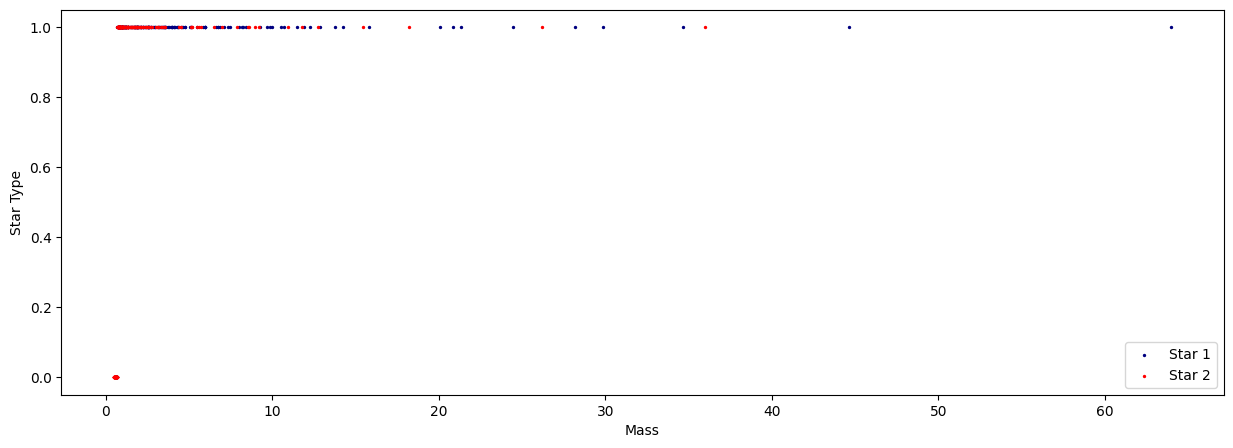

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(binaries['mass_1'], binaries['kstar_1'], color='navy', label='Star 1', s=2)
plt.scatter(binaries['mass_2'], binaries['kstar_2'], color='red', label='Star 2', s=2)
plt.ylabel('Star Type')
plt.xlabel('Mass')

ax = plt.subplot()
ax.legend()

Text(0.5, 0, 'Mass [m_Sun]')

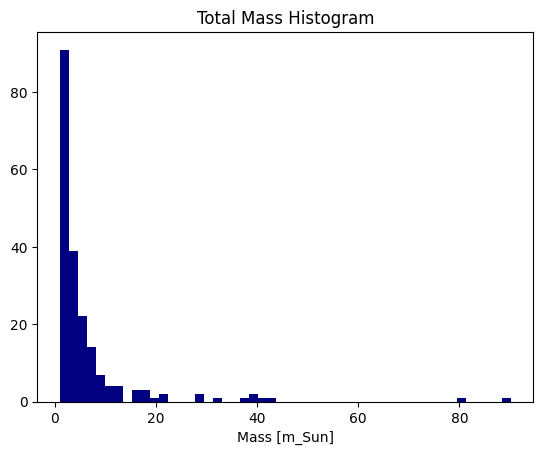

In [ ]:
plt.hist(binaries['mass_1']+binaries['mass_2'], bins=50, color='navy')
plt.title('Total Mass Histogram')
plt.xlabel('Mass [m_Sun]')

In [ ]:
for i, row in df.iterrows():
    print(f"{row['Name']:7s} has an equilibrium temperature of {row['T_eq']:.1f} K.")

Mercury has an equilibrium temperature of 430.4 K.
Venus   has an equilibrium temperature of 233.0 K.
Earth   has an equilibrium temperature of 254.2 K.
Mars    has an equilibrium temperature of 211.6 K.
Jupiter has an equilibrium temperature of 102.6 K.
Saturn  has an equilibrium temperature of 81.4 K.
Uranus  has an equilibrium temperature of 58.1 K.
Neptune has an equilibrium temperature of 46.6 K.


Text(0.5, 0, 'Mass_2/Mass_1')

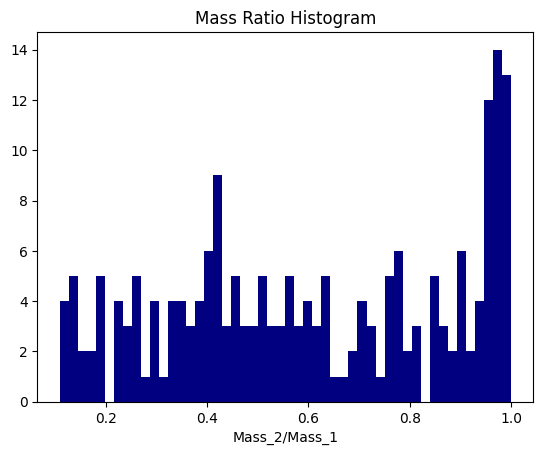

In [ ]:
plt.hist(binaries['mass_2']/binaries['mass_1'], bins=50, color='navy')
plt.title('Mass Ratio Histogram')
plt.xlabel('Mass_2/Mass_1')

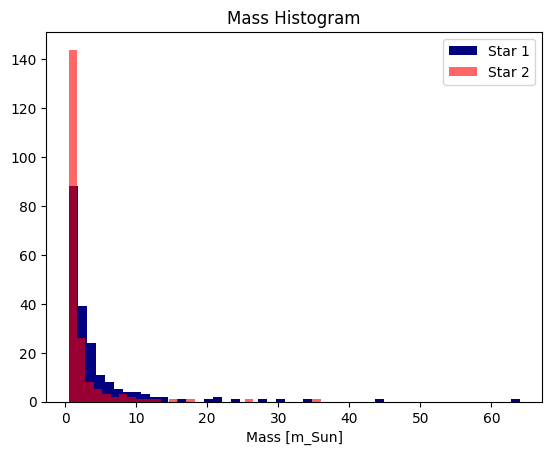

In [ ]:
plt.hist(binaries['mass_1'], bins=50, color='navy', label='Star 1')
plt.hist(binaries['mass_2'], bins=30, color='red', alpha=0.6, label='Star 2')
plt.title('Mass Histogram')
plt.xlabel('Mass [m_Sun]')
plt.legend()

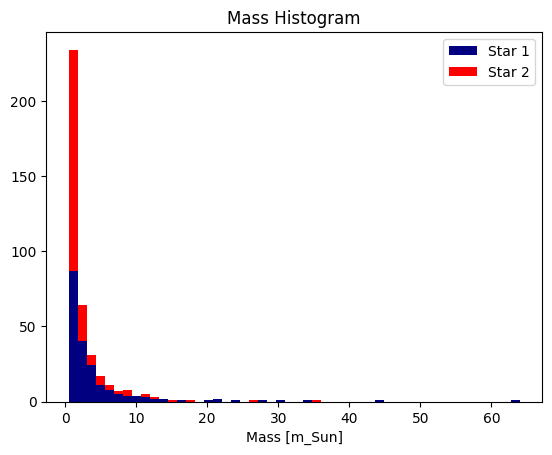

In [ ]:
plt.hist([binaries['mass_1'], binaries['mass_2']], bins =50, stacked=True,
         label = ['Star 1', 'Star 2'], color =['navy','red'])
plt.title('Mass Histogram')
plt.xlabel('Mass [m_Sun]')
ax = plt.subplot()
ax.legend()

Text(0.5, 0, 'Mass [m_Sun]')

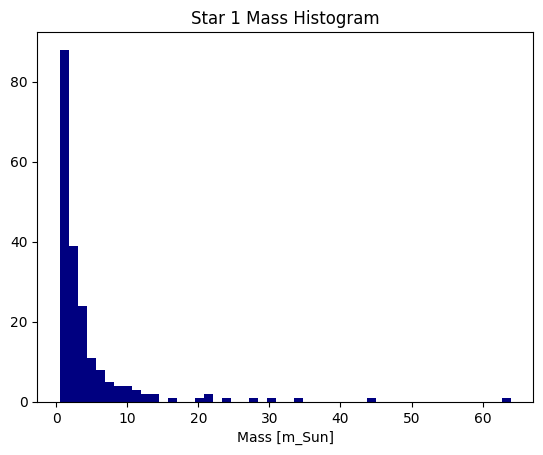

In [ ]:
plt.hist(binaries['mass_1'], bins=50, color='navy')
plt.title('Star 1 Mass Histogram')
plt.xlabel('Mass [m_Sun]')

Text(0.5, 0, 'Mass [m_Sun]')

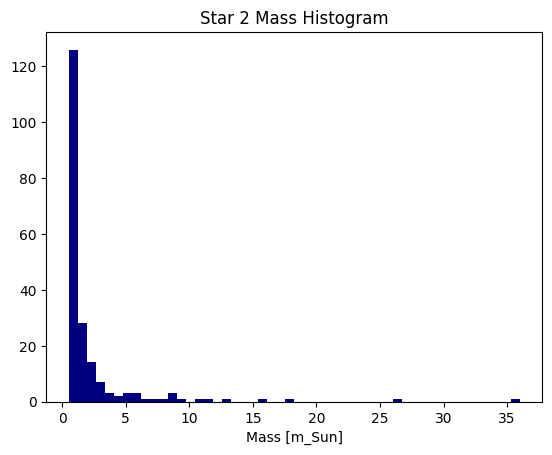

In [ ]:
plt.hist(binaries['mass_2'], bins=50, color='navy')
plt.title('Star 2 Mass Histogram')
plt.xlabel('Mass [m_Sun]')

Text(0.5, 1.0, 'Eccentricity')

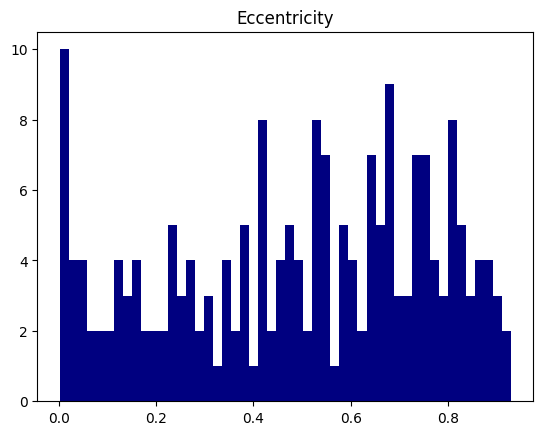

In [ ]:
plt.hist(binaries['ecc'], bins=50, color='navy')
plt.title('Eccentricity')

Text(0.5, 1.0, 'Total Mass vs Mass Ratio')

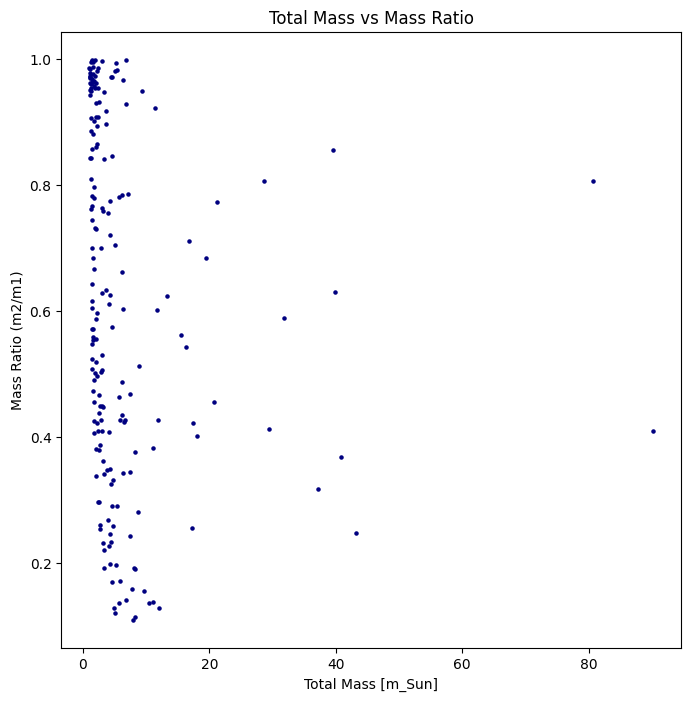

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(binaries['mass_1']+binaries['mass_2'], binaries['mass_2']/binaries['mass_1'], color = 'navy', s=5)
plt.xlabel('Total Mass [m_Sun]')
plt.ylabel('Mass Ratio (m2/m1)')
plt.title('Total Mass vs Mass Ratio')

Text(0.5, 1.0, 'Orbital Period vs Eccentricity')

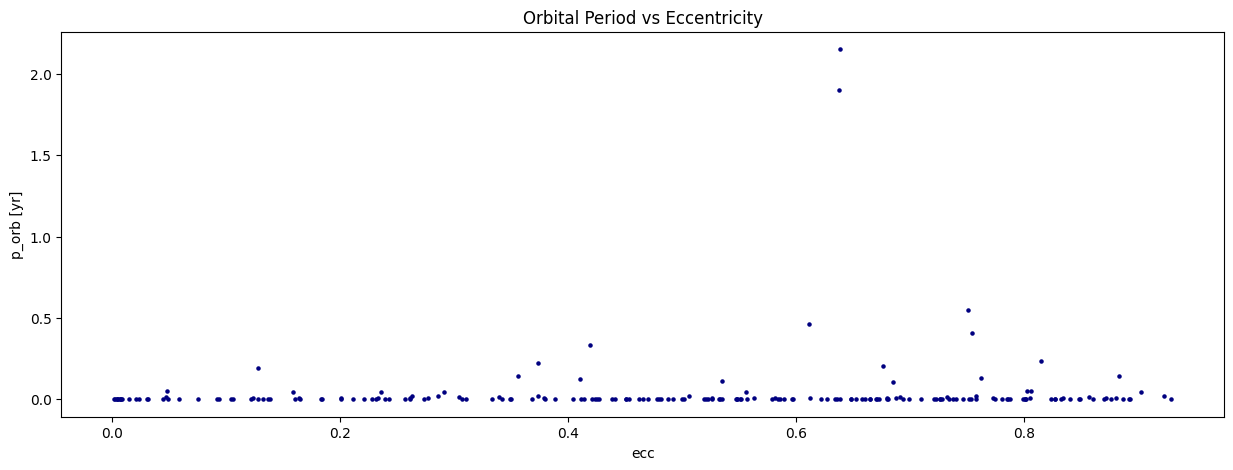

In [ ]:
plt.figure(figsize = (15, 5))
plt.scatter(binaries['ecc'], binaries['porb']/sYR, color = 'navy', s=5)
plt.xlabel('ecc')
plt.ylabel('p_orb [yr]')
plt.title('Orbital Period vs Eccentricity')

### 1.3.5 Practice Problem 4: Potentially Hazardous Asteroids

In [ ]:
# Running in Google Colab? Run this cell to download the file for this problem
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/PHA_data.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-07-19 23:10:25--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/PHA_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315721 (308K) [text/plain]
Saving to: ‘PHA_data.csv.1’

PHA_data.csv.1      100%[===================>] 308.32K  --.-KB/s    in 0.04s   

2024-07-19 23:10:26 (6.86 MB/s) - ‘PHA_data.csv.1’ saved [315721/315721]



In this problem, you will look at a dataset describing Potentially Hazardous Asteroids (PHAs) which are cataloged by the Minor Planets Center, hosted at the Harvard-Smithsonian Center for Astrophysics. You will find out why these are called Potentially Hazardous.

The original version of this data can be found [here](https://www.minorplanetcenter.net/data). The version supplied here has been reformatted for easier reading by `pd.read_csv()`. Note that the Center updates this data frequently, so the version here, made in early 2023, may be wildly inaccurate.

The first thing to do is to open the file and look at the contents. Notice that the first line of the file contains a description of the columns. Therefore, it would be a good idea to use the keyword argument `header=0`. Similarly, the first column of data is an index, so you should use the keyword argument `index_col=0`. Finally, the last column contains a bunch of dates. In order to make sure pandas parses this data correctly, we can use the keyword argument `parse_dates=['Date of last observation']`. In the cell below, put this all together and read the file using `pd.read_csv()`. Print the dataframe and inspect it to make sure nothing is out of the ordinary. Report the total number of rows.

In [ ]:
#!cat PHA_data.csv

In [ ]:
PHA_df = pd.read_csv('PHA_data.csv', header=0, index_col=0, parse_dates=['Date of last observation'])
PHA_df

,Designation,Abs Mag,Slope Param,Epoch,Mean anom (deg),Argument of Perihelion (deg),Longitude of Ascending Node (deg),Inclination to Ecliptic (deg),Eccentricity,Mean daily motion (deg/day),Semimajor Axis (AU),Reference,N observation,N oppositions,Readable Designation,Date of last observation
0,01566,16.50,0.15,K232P,352.54819,31.44177,87.95165,22.79955,0.826869,0.880439,1.078127,MPO719076,1330,39,(1566) Icarus,2022-08-01
1,01620,15.32,0.15,K232P,224.05341,276.96118,337.17213,13.33636,0.335535,0.708921,1.245673,E2023-C50,5375,40,(1620) Geographos,2023-02-07
2,01862,16.11,0.09,K232P,281.24750,286.05510,35.56144,6.35319,0.559874,0.552634,1.470656,E2023-C29,2204,34,(1862) Apollo,2023-02-01
3,01981,15.28,0.15,K232P,9.03147,267.81921,356.85489,39.82990,0.649989,0.416223,1.776582,MPO691531,1052,25,(1981) Midas,2021-10-20
4,02101,18.72,0.15,K232P,0.32752,43.63171,349.47384,1.32170,0.764346,0.384249,1.873819,MPO727488,134,11,(2101) Adonis,2020-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,z4433,20.58,0.15,K232P,134.23024,247.33996,68.12942,18.21503,0.455263,0.535376,1.502092,MPO732367,187,6,(614433) 2009 KK,2022-12-15
2326,z4470,18.39,0.15,K232P,256.53119,336.90766,0.16183,6.72972,0.594930,0.271636,2.361263,MPO732367,430,5,(614470) 2009 ST19,2021-01-06
2327,z8350,19.96,0.15,K232P,312.19876,78.86174,163.38127,7.92586,0.473430,0.508819,1.553914,E2023-BF5,227,6,(618350) 2021 PS2,2023-01-27
2328,z9106,20.11,0.15,K232P,110.97642,294.87859,317.20798,1.19960,0.574266,0.463054,1.654685,MPO723643,477,6,(619106) 2005 SQ,2022-10-02


In [ ]:
print(f'The data frame has {PHA_df.shape[0]:4d} rows.')
print(f'The data frame has {PHA_df.shape[1]:4d} columns.')

The data frame has 2330 rows.
The data frame has   16 columns.


Next, make two histograms, one for the pericenter and one for the apocenter of each object. Add additional lines using `plt.axvline()` representing the semimajor axis of the inner planets. Optionally, also add dashed lines around these solid lines corresponding to the pericenter and apocenter of the inner planets and Jupiter. If you can, add shading to the region in between the dashed lines using `plt.axvspan`.

The documentation of `plt.axvline()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline). The documentation of `plt.axvspan()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html). Here's an example for how you'd do this for Mars. Note I am shading the region but without the dashed lines for the pericenter and apocenter. When doing this for multiple planets, it would be easier to do so with a for loop.
```
Mars_SMA = 1.524 # AU
Mars_ecc = 0.0934

Mars_peri = Mars_SMA*(1 - Mars_ecc)
Mars_apo = Mars_SMA*(1 + Mars_ecc)

plt.axvline(x = Mars_SMA, color='g')
plt.axvspan(Mars_peri, Mars_apo, facecolor='g', alpha=0.5)
```

Do you notice anything potentially alarming? In order to make this a more quantitative claim, how many objects in the dataset have a pericenter smaller than Earth's semimajor axis AND an apocenter larger than Earth's semimajor axis? Repeat this for each of the inner planets and Jupiter.

You should notice that some of these objects do not seem to have Earth-crossing orbits. Why do you think they're on this list?

In [ ]:
PHA_df['Pericenter'] = PHA_df['Semimajor Axis (AU)']*(1-PHA_df['Eccentricity'])
PHA_df['Apocenter'] = PHA_df['Semimajor Axis (AU)']*(1+PHA_df['Eccentricity'])

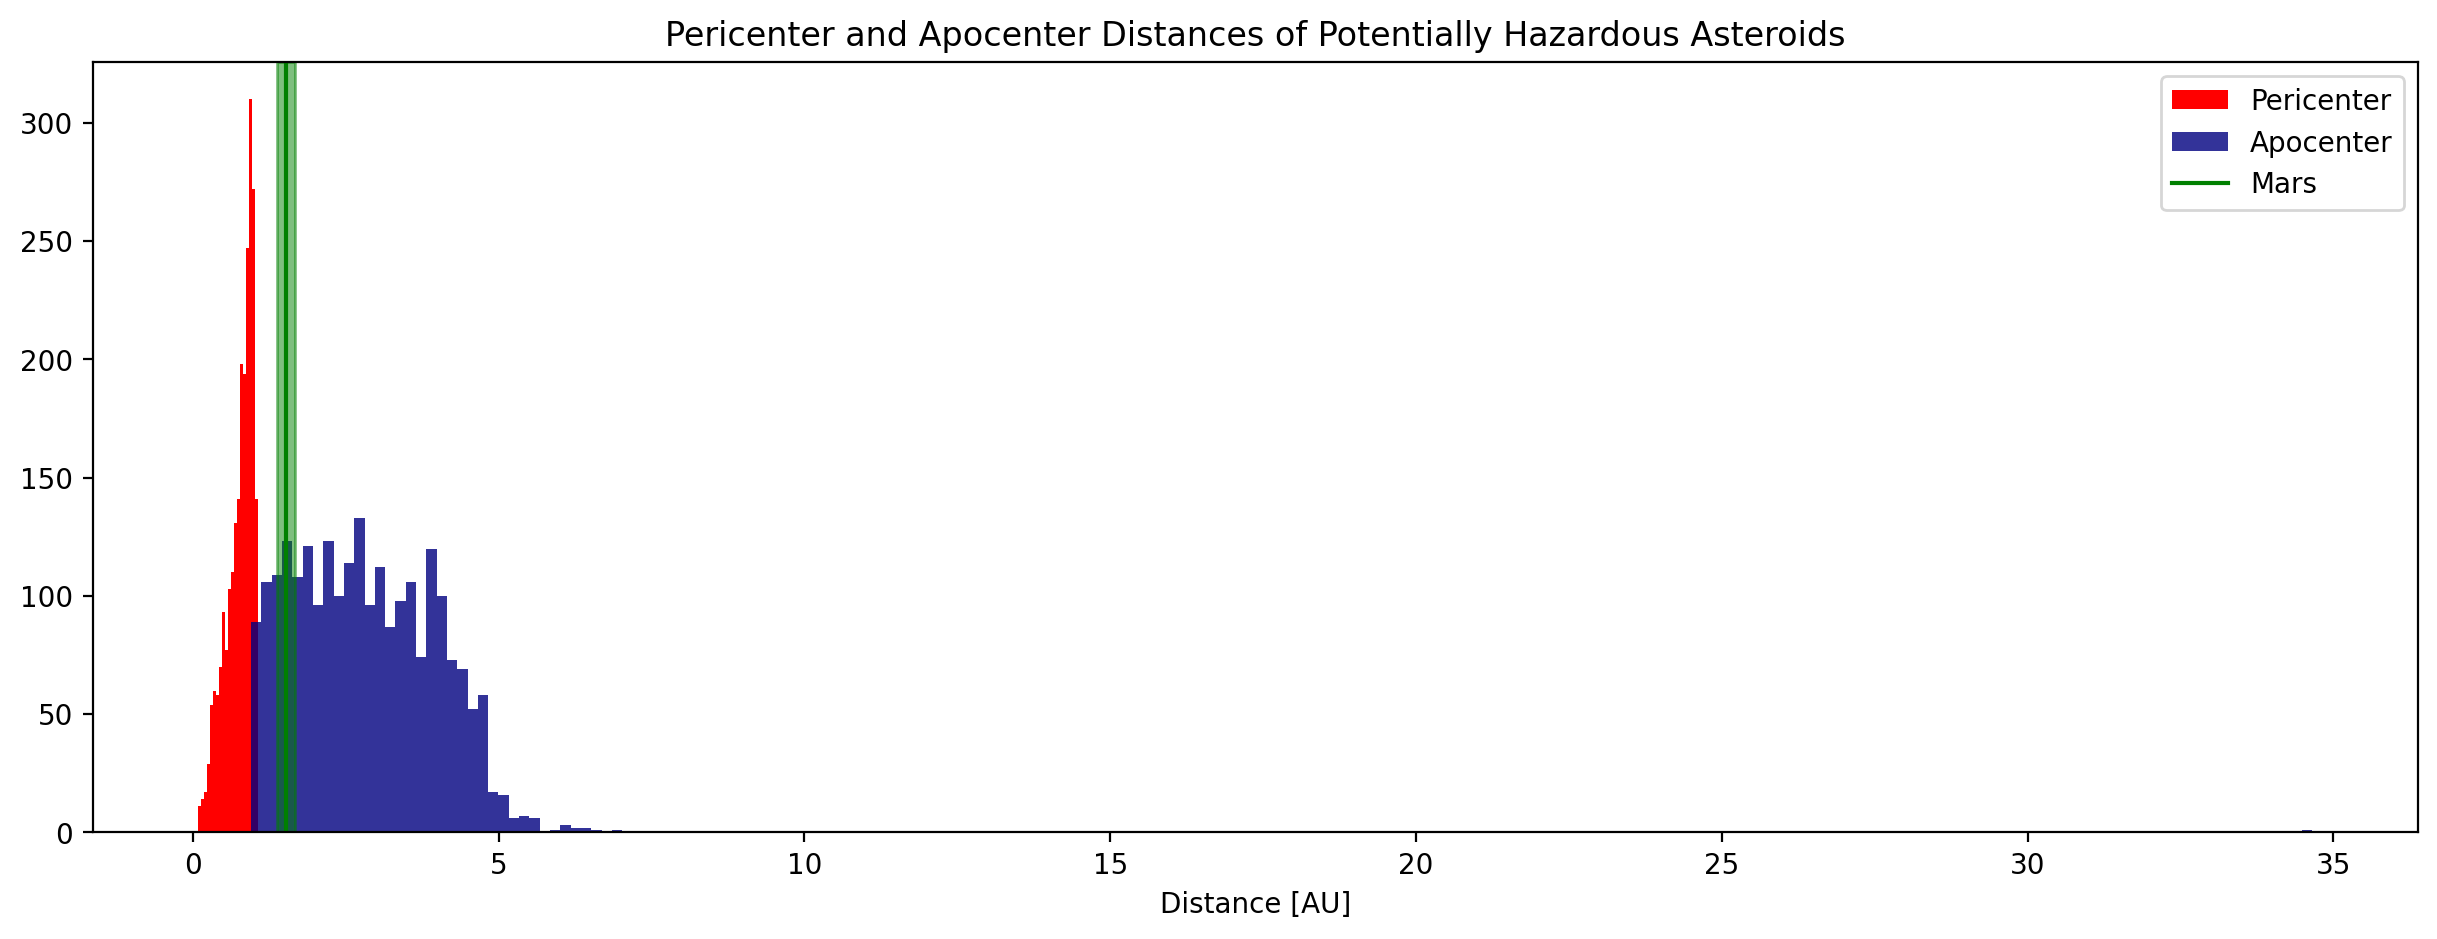

In [ ]:
Mars_SMA = 1.524 # AU
Mars_ecc = 0.0934

Mars_peri = Mars_SMA*(1 - Mars_ecc)
Mars_apo = Mars_SMA*(1 + Mars_ecc)


plt.figure(figsize=(15,5), dpi =200)
plt.hist(PHA_df['Pericenter'], color='red', bins = 20, label='Pericenter')
plt.hist(PHA_df['Apocenter'], color='navy', bins = 200, alpha= 0.8, label='Apocenter')
plt.xlabel('Distance [AU]')
plt.title('Pericenter and Apocenter Distances of Potentially Hazardous Asteroids')
plt.axvline(x = Mars_SMA, color='g', label="Mars")
plt.axvspan(Mars_peri, Mars_apo, color='g', alpha=0.5)
ax= plt.subplot()
ax.legend()

In [ ]:
df['Distance']

0     0.4
1     0.7
2     1.0
3     1.5
4     5.2
5     9.5
6    19.2
7    30.1
Name: Distance, dtype: float64

In [ ]:
ecc = np.array([0.2056, 0.0068, 0.0167, 0.0934, 0.0484])

In [ ]:
df_pha_planets = df[df['Distance']<6]
df_pha_planets

,Name,Mass,Distance,N_moons,Radius,Density,Orbital_Period,A_Bond,T_eq,T_eff
0,Mercury,0.0553,0.4,0,0.383,5426.898863,0.252983,0.088,430.372206,412.5
1,Venus,0.8150,0.7,0,0.949,5257.531581,0.585662,0.760,233.012540,737.0
2,Earth,1.0000,1.0,1,1.000,5513.443376,1.000000,0.306,254.223311,288.0
3,Mars,0.1070,1.5,2,0.532,3918.066469,1.837120,0.250,211.638751,215.0
4,Jupiter,317.8000,5.2,95,11.210,1243.826982,11.852189,0.503,102.556438,124.4


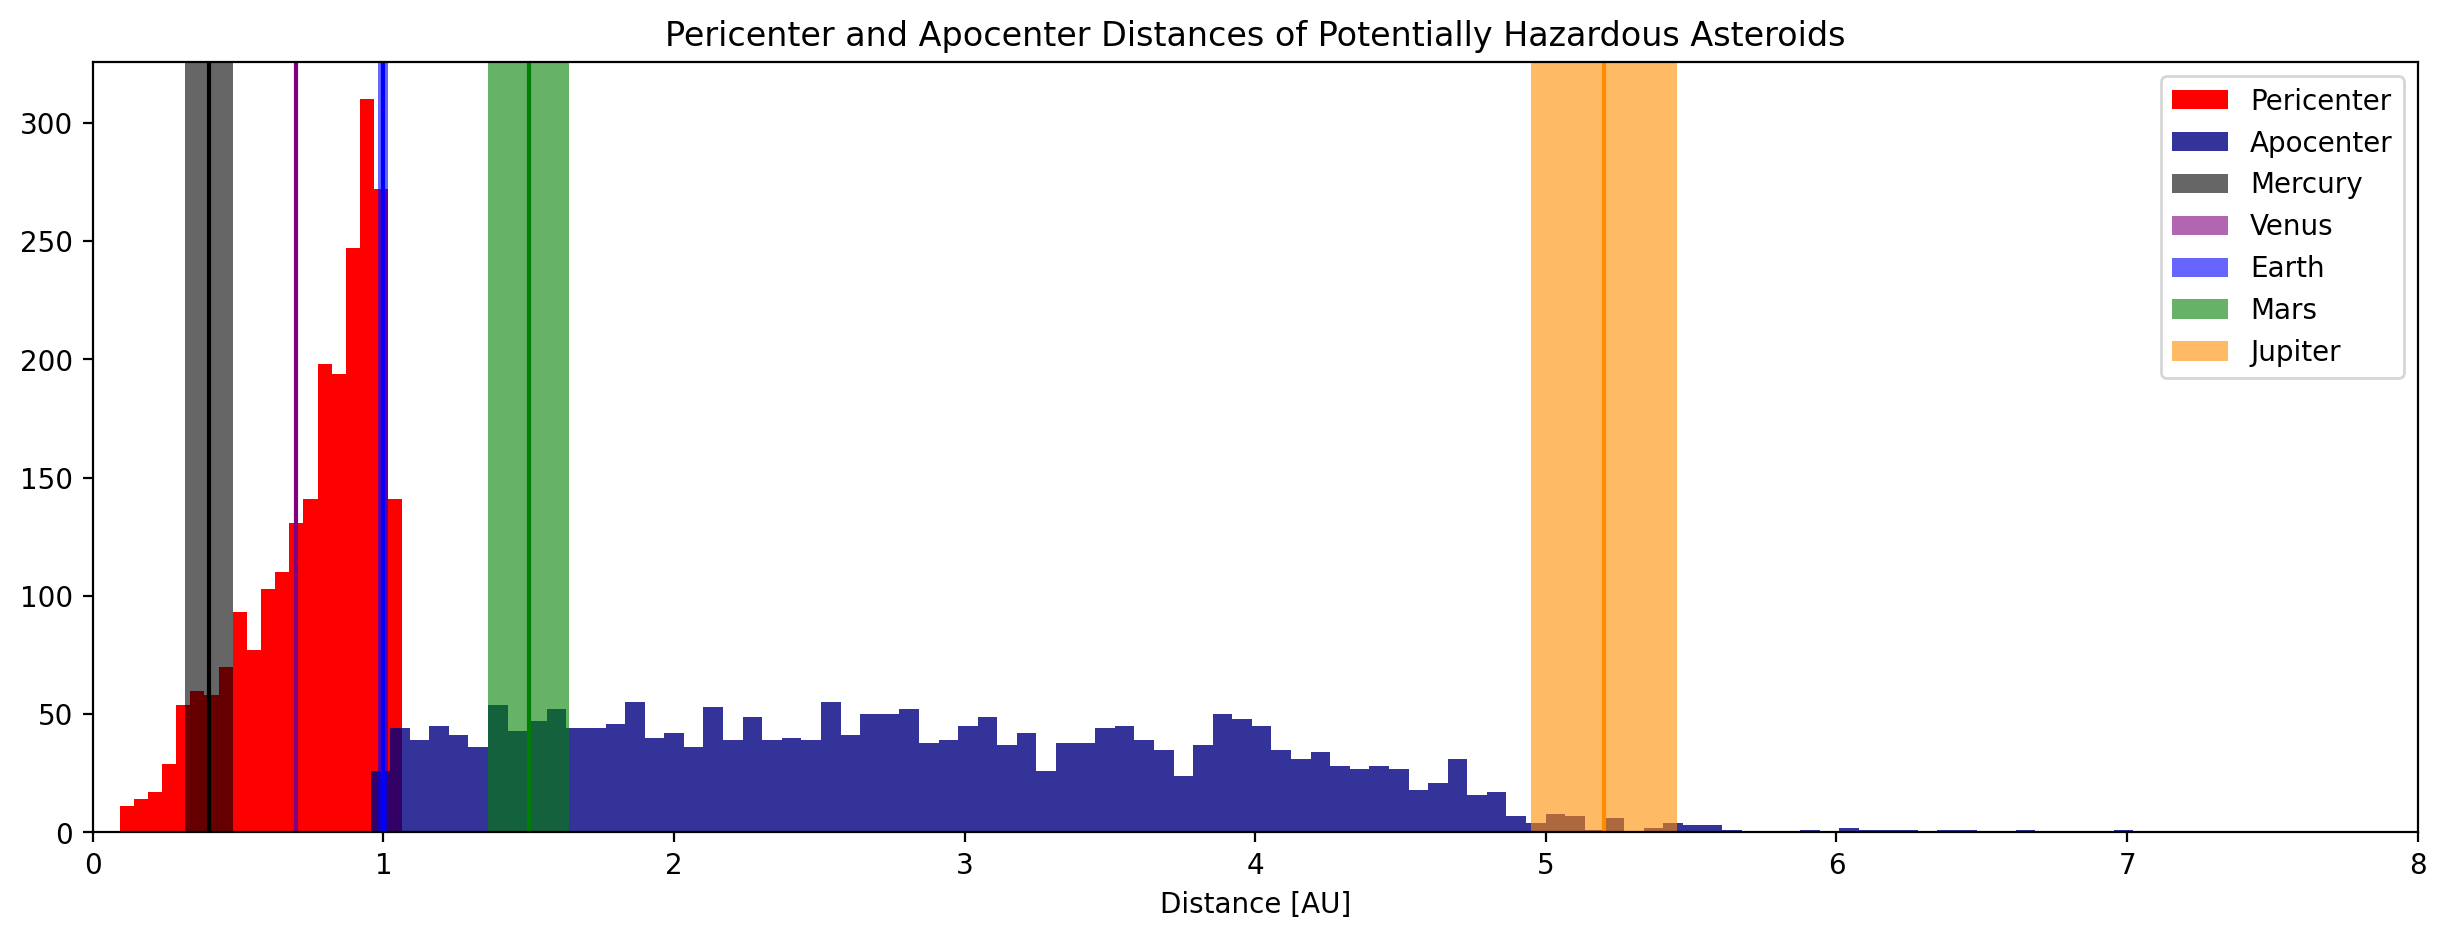

In [ ]:
dist = df_pha_planets['Distance']
names = df_pha_planets['Name']
color_list = ['black', 'purple' ,'blue', 'green', 'darkorange']


plt.figure(figsize=(15,5), dpi=200)
plt.hist(PHA_df['Pericenter'], color='red', bins = 20, label='Pericenter')
plt.hist(PHA_df['Apocenter'], color='navy', bins = 500, alpha= 0.8, label='Apocenter')
plt.xlim([0,8])
plt.xlabel('Distance [AU]')
plt.title('Pericenter and Apocenter Distances of Potentially Hazardous Asteroids')
for i in range(len(ecc)):
    planet_SMA = dist[i]
    planet_ecc = ecc[i]
    planet_peri = planet_SMA*(1 - planet_ecc)
    planet_apo = planet_SMA*(1 + planet_ecc)
    plt.axvline(x = planet_SMA, color= color_list[i])
    plt.axvspan(planet_peri, planet_apo, facecolor=color_list[i], alpha=0.6, label = names[i])
ax=plt.subplot()
ax.legend()

Make an additional histogram showing the dates of last observation. Since this is datetime data, which pandas handles internally quite efficiently, you can use the method `df['Date of Last Observation'].hist()` to do this quickly. Look at the range on the x-axis. Is this concerning?


<Axes: >

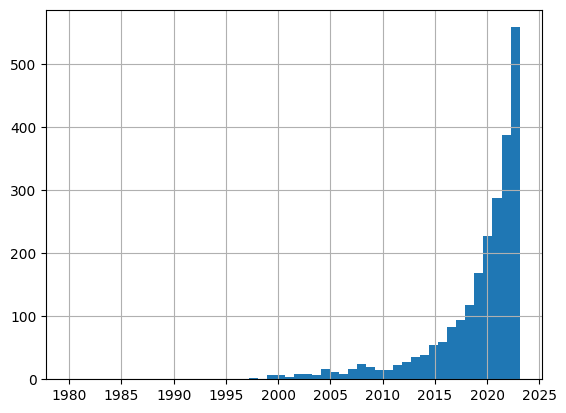

In [ ]:
PHA_df['Date of last observation'].hist(bins=50)

The range on the x axis is not concerning.

***Optional***

We can make a better version of the first two histograms in a way that's visually more intuitive. For the purposes of the code below, I'll assume you named your Dataframe `df`.

First, let's reorder the rows to sort by pericenter and apocenter values in ascending order.
```
df = df.sort_values(by=['peri', 'apo'])
```
Next, since the dataset is so large, let's select only a subset of the rows to visualize. However, we still want to show the whole extent of the dataset, so choosing the first chunk of the data would not be a good option. Instead, let's choose every nth row. For this case, I'll use `n=40`, though you should feel free to play around with this number. I will make this a variable so it is easy to change later.
```
nth_row = 40
df_reduced = df.iloc[::nth_row, :]
```
One more step. In order to make our plot look nice, let's also reset the index. Optionally, you can add the keyword argument `drop=True`. If you don't (I will not), then your new dataframe will add the old indices as a new column.
```
df_reduced = df_reduced.reset_index()
```
Now, we can get to plotting. What we will do is use the index value as the y-value so that each object gets its own line. For the x-values, we will use the semimajor axis. We will also include the extent of the orbit by plotting the pericenter and apocenter using errorbar.
```
xdata = df_reduced['Semimajor Axis (AU)'].values
ydata = df_reduced.index
xerr_low = xdata - df_reduced['peri'].values
xerr_high = df_reduced['apo'].values - xdata
xerr = (xerr_low, xerr_high)
plt.errorbar(xdata, ydata, xerr = xerr, linestyle='')
```
As before, also added some vertical lines and shaded regions representing the inner planets.

In [ ]:
PHA_df = PHA_df.sort_values(by=['Pericenter', 'Apocenter'])
PHA_df

,Designation,Abs Mag,Slope Param,Epoch,Mean anom (deg),Argument of Perihelion (deg),Longitude of Ascending Node (deg),Inclination to Ecliptic (deg),Eccentricity,Mean daily motion (deg/day),Semimajor Axis (AU),Reference,N observation,N oppositions,Readable Designation,Date of last observation,Pericenter,Apocenter
1930,b4158,18.72,0.15,K232P,264.05599,149.67652,39.46817,23.84961,0.926757,0.691530,1.266471,MPO722468,250,12,(374158) 2004 UL,2022-09-22,0.092760,2.440183
741,K11K00E,19.81,0.15,K232P,198.86080,188.54919,205.00252,5.89092,0.954688,0.300644,2.206822,MPO703497,199,3,2011 KE,2018-04-15,0.099996,4.313649
769,K11X03A,20.46,0.15,K232P,85.44703,323.91779,273.44268,28.02148,0.925902,0.554793,1.466838,MPO732909,155,4,2011 XA3,2022-11-12,0.108689,2.824988
1964,d9457,19.30,0.15,K232P,74.94851,210.96654,315.06253,25.96849,0.956275,0.248207,2.507608,MPO712841,175,7,(399457) 2002 PD43,2022-08-20,0.109645,4.905571
1951,c6454,19.99,0.15,K232P,223.40538,27.40151,240.59473,5.44202,0.909055,0.729366,1.222285,MPO698781,88,4,(386454) 2008 XM,2014-01-29,0.111161,2.333409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,K15XZ2A,21.98,0.15,K232P,195.70148,15.38906,236.54135,4.11228,0.168960,0.689171,1.269360,MPO724611,75,4,2015 XA352,2022-10-20,1.054890,1.483831
2261,q6587,20.02,0.15,K232P,150.59073,180.96935,169.31473,27.56859,0.324567,0.504872,1.562003,MPO701425,45,6,(526587) 2006 TB,2021-02-12,1.055029,2.068977
1723,K22M04E,21.74,0.15,K232P,60.94591,167.60596,132.65115,13.52117,0.560933,0.264605,2.402910,MPO725067,44,1,2022 ME4,2022-10-02,1.055038,3.750781
1705,K22F03U,21.41,0.15,K232P,84.34820,172.28665,94.28140,5.15294,0.498463,0.322995,2.103807,MPO714643,165,2,2022 FU3,2022-08-30,1.055137,3.152477


In [ ]:
nth_row = 40
PHA_df_reduced = PHA_df.iloc[::nth_row, :]
PHA_df_reduced

,Designation,Abs Mag,Slope Param,Epoch,Mean anom (deg),Argument of Perihelion (deg),Longitude of Ascending Node (deg),Inclination to Ecliptic (deg),Eccentricity,Mean daily motion (deg/day),Semimajor Axis (AU),Reference,N observation,N oppositions,Readable Designation,Date of last observation,Pericenter,Apocenter
1930,b4158,18.72,0.15,K232P,264.05599,149.67652,39.46817,23.84961,0.926757,0.691530,1.266471,MPO722468,250,12,(374158) 2004 UL,2022-09-22,0.092760,2.440183
522,K07K07G,20.70,0.15,K232P,197.09861,318.60902,66.01356,4.75894,0.866994,0.414413,1.781751,MPO713806,37,1,2007 KG7,2007-06-18,0.236983,3.326519
1403,K19F00J,19.09,0.15,K232P,199.17365,150.21135,156.90198,44.43726,0.612802,1.481092,0.762222,MPO733733,86,4,2019 FJ,2022-12-19,0.295131,1.229313
2226,p8847,19.04,0.15,K232P,171.80370,221.00305,140.77999,5.00394,0.840005,0.328368,2.080793,MPO723153,98,10,(518847) 2010 DM,2022-02-03,0.332917,3.828668
1616,K21H03C,21.57,0.15,K232P,143.88934,132.14771,219.54174,28.39724,0.675617,0.829702,1.121643,E2022-KA3,138,2,2021 HC3,2022-05-24,0.363842,1.879444
1816,P2399,19.45,0.15,K232P,259.75614,136.03390,57.76657,15.21262,0.546021,1.204623,0.874786,MPO730036,277,9,(252399) 2001 TX44,2020-09-29,0.397135,1.352438
748,K11O00B,19.30,0.15,K232P,257.90838,48.91454,106.23521,27.73922,0.524121,1.146697,0.904004,MPO562322,69,6,2011 OB,2019-09-10,0.430197,1.377811
197,G2825,17.97,0.15,K232P,88.67315,78.85167,159.78430,9.07442,0.743173,0.416838,1.774836,MPO729298,436,13,(162825) 2001 BO61,2022-11-21,0.455825,3.093846
1663,K21U03N,21.42,0.15,K232P,190.33002,110.36969,170.85037,6.08333,0.760209,0.340047,2.032872,MPO714640,49,1,2021 UN3,2021-11-10,0.487464,3.578281
658,K09X06T,20.36,0.15,K232P,52.17363,81.97101,264.94701,5.73996,0.767957,0.306337,2.179397,E2022-L76,123,2,2009 XT6,2022-06-03,0.505714,3.853081


In [ ]:
len(PHA_df_reduced)

59

In [ ]:
PHA_df_reduced = PHA_df_reduced.reset_index()
PHA_df_reduced

,index,Designation,Abs Mag,Slope Param,Epoch,Mean anom (deg),Argument of Perihelion (deg),Longitude of Ascending Node (deg),Inclination to Ecliptic (deg),Eccentricity,Mean daily motion (deg/day),Semimajor Axis (AU),Reference,N observation,N oppositions,Readable Designation,Date of last observation,Pericenter,Apocenter
0,1930,b4158,18.72,0.15,K232P,264.05599,149.67652,39.46817,23.84961,0.926757,0.691530,1.266471,MPO722468,250,12,(374158) 2004 UL,2022-09-22,0.092760,2.440183
1,522,K07K07G,20.70,0.15,K232P,197.09861,318.60902,66.01356,4.75894,0.866994,0.414413,1.781751,MPO713806,37,1,2007 KG7,2007-06-18,0.236983,3.326519
2,1403,K19F00J,19.09,0.15,K232P,199.17365,150.21135,156.90198,44.43726,0.612802,1.481092,0.762222,MPO733733,86,4,2019 FJ,2022-12-19,0.295131,1.229313
3,2226,p8847,19.04,0.15,K232P,171.80370,221.00305,140.77999,5.00394,0.840005,0.328368,2.080793,MPO723153,98,10,(518847) 2010 DM,2022-02-03,0.332917,3.828668
4,1616,K21H03C,21.57,0.15,K232P,143.88934,132.14771,219.54174,28.39724,0.675617,0.829702,1.121643,E2022-KA3,138,2,2021 HC3,2022-05-24,0.363842,1.879444
5,1816,P2399,19.45,0.15,K232P,259.75614,136.03390,57.76657,15.21262,0.546021,1.204623,0.874786,MPO730036,277,9,(252399) 2001 TX44,2020-09-29,0.397135,1.352438
6,748,K11O00B,19.30,0.15,K232P,257.90838,48.91454,106.23521,27.73922,0.524121,1.146697,0.904004,MPO562322,69,6,2011 OB,2019-09-10,0.430197,1.377811
7,197,G2825,17.97,0.15,K232P,88.67315,78.85167,159.78430,9.07442,0.743173,0.416838,1.774836,MPO729298,436,13,(162825) 2001 BO61,2022-11-21,0.455825,3.093846
8,1663,K21U03N,21.42,0.15,K232P,190.33002,110.36969,170.85037,6.08333,0.760209,0.340047,2.032872,MPO714640,49,1,2021 UN3,2021-11-10,0.487464,3.578281
9,658,K09X06T,20.36,0.15,K232P,52.17363,81.97101,264.94701,5.73996,0.767957,0.306337,2.179397,E2022-L76,123,2,2009 XT6,2022-06-03,0.505714,3.853081


<ErrorbarContainer object of 3 artists>

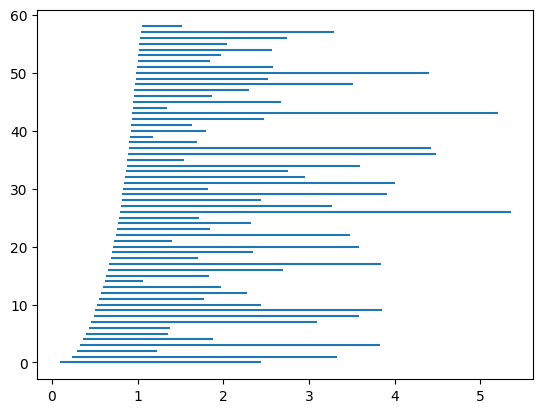

In [ ]:
xdata = PHA_df_reduced['Semimajor Axis (AU)'].values
ydata = PHA_df_reduced.index
xerr_low = xdata - PHA_df_reduced['Pericenter'].values
xerr_high = PHA_df_reduced['Apocenter'].values - xdata
xerr = (xerr_low, xerr_high)
plt.errorbar(xdata, ydata, xerr = xerr, linestyle='')